In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D

plt.style.use('default')

     chordID  trialPoint
202    11911           1
untrained


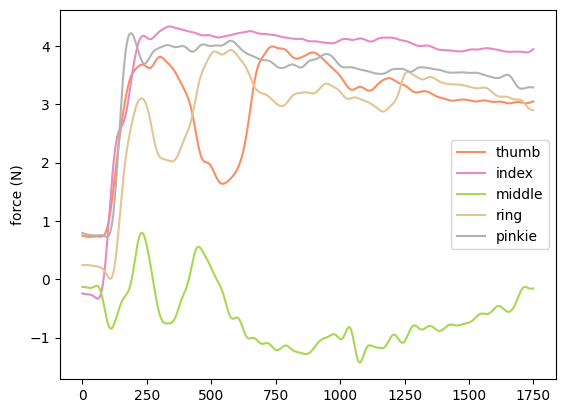

In [13]:
experiment = 'efc4'
ch_idx = np.array(gl.diffCols[experiment])
ntrial = 10
sn = 101
day = 4
BN = 5

pinfo = pd.read_csv(os.path.join(gl.baseDir, experiment, 'participants.tsv'), sep='\t')
trained = pinfo[pinfo.sn == sn].reset_index()['trained'][0].split('.')

dat = pd.read_csv(os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}', f'{experiment}_{sn}.dat'), sep='\t')
dat = dat[dat['BN']==BN]
filename = os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}',f'{experiment}_{sn}_{int(BN):02d}.mov')
mov = load_mov(filename)
mov = np.concatenate(mov, axis=0)
mov = mov[mov[:, 1] == gl.wait_exec[experiment]]
force_tmp = mov[mov[:, 0] == ntrial + 1][:, ch_idx] * gl.fGain
force_filt = lowpass_fir(force_tmp, n_ord=4, cutoff=10, fsample=gl.fsample['force'], axis=0)
force_der1 = np.gradient(force_filt, 1 / gl.fsample['force'], axis=0)

print(dat[dat['TN'] == ntrial + 1][['chordID', 'trialPoint']])
if dat.iloc[ntrial]['chordID'].astype(str) in trained:
    print('trained')
else:
    print('untrained')

fig, ax = plt.subplots()

cmap = plt.get_cmap('Set2', 6)
finger = ['thumb', 'index', 'middle', 'ring', 'pinkie']
for f in range(5):
    ax.plot(force_filt[:, f], color=cmap(f + 1), label=finger[f])

ax.set_ylabel('force (N)')
ax.legend()

plt.show()


     chordID  trialPoint
202    12129           1
untrained


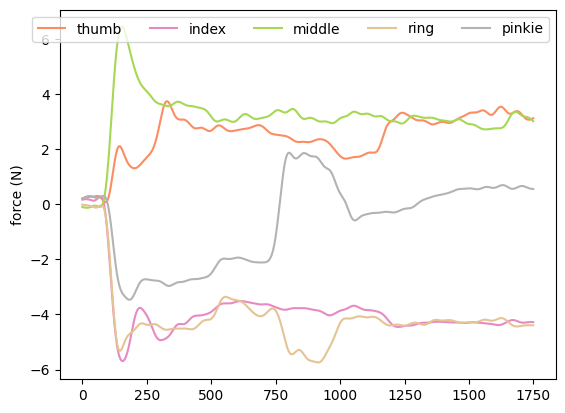

In [14]:
experiment = 'efc4'
ch_idx = np.array(gl.diffCols[experiment])
ntrial = 10
sn = 101
day = 24
BN = 5

pinfo = pd.read_csv(os.path.join(gl.baseDir, experiment, 'participants.tsv'), sep='\t')
trained = pinfo[pinfo.sn == sn].reset_index()['trained'][0].split('.')

dat = pd.read_csv(os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}', f'{experiment}_{sn}.dat'), sep='\t')
dat = dat[dat['BN']==BN]
filename = os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}',f'{experiment}_{sn}_{int(BN):02d}.mov')
mov = load_mov(filename)
mov = np.concatenate(mov, axis=0)
mov = mov[mov[:, 1] == gl.wait_exec[experiment]]
force_tmp = mov[mov[:, 0] == ntrial + 1][:, ch_idx] * gl.fGain
force_filt = lowpass_fir(force_tmp, n_ord=4, cutoff=10, fsample=gl.fsample['force'], axis=0)
force_der1 = np.gradient(force_filt, 1 / gl.fsample['force'], axis=0)

print(dat[dat['TN'] == ntrial + 1][['chordID', 'trialPoint']])
if dat.iloc[ntrial]['chordID'].astype(str) in trained:
    print('trained')
else:
    print('untrained')

fig, ax = plt.subplots()

cmap = plt.get_cmap('Set2', 6)
finger = ['thumb', 'index', 'middle', 'ring', 'pinkie']
for f in range(5):
    ax.plot(force_filt[:, f], color=cmap(f + 1), label=finger[f])

ax.set_ylabel('force (N)')
ax.legend(loc='best', ncol=5)

plt.show()


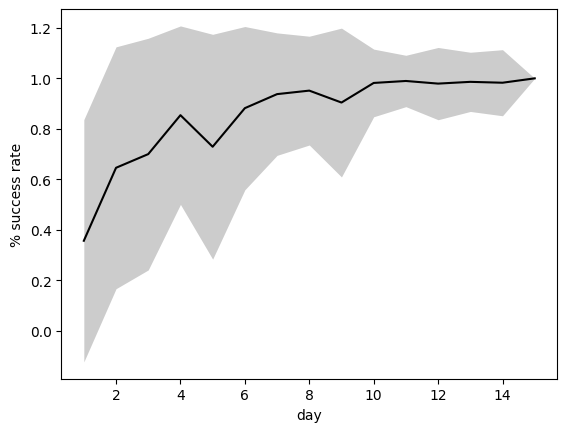

In [15]:
until_day = 15
days = np.arange(1, until_day + 1, 1)
sn = 102
experiment = 'efc4'

dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.lineplot(x='day', y='trialPoint', data=dat, errorbar='sd', err_kws={'linewidth': 0}, color='k')

plt.ylabel('% success rate')
plt.show()

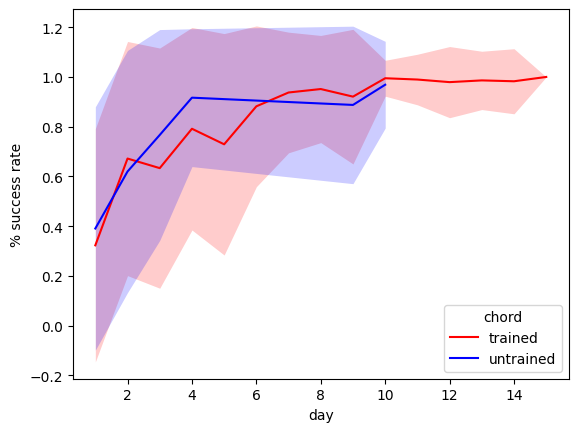

In [16]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

dat['chordID'] = dat['chordID'].astype(str)
sns.lineplot(x='day', y='trialPoint', hue='chord', data=dat, errorbar='sd', err_kws={'linewidth': 0}, palette=['red', 'blue'])

plt.ylabel('% success rate')
plt.show()

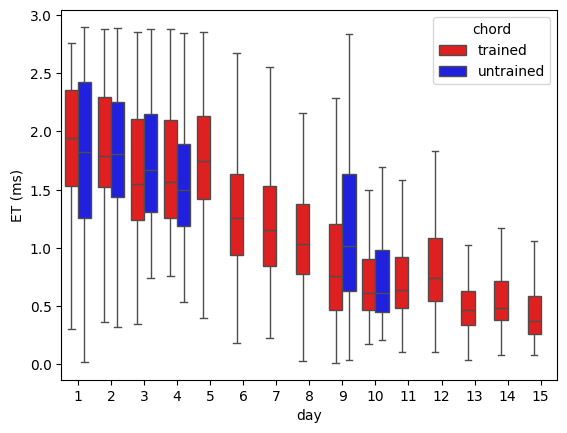

In [17]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='ET', data=dat, hue='chord', palette=['red', 'blue'],showfliers=False)

plt.ylabel('ET (ms)')
plt.show()

/tmp/ipykernel_776956/4123058481.py:15: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
/tmp/ipykernel_776956/4123058481.py:17: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,


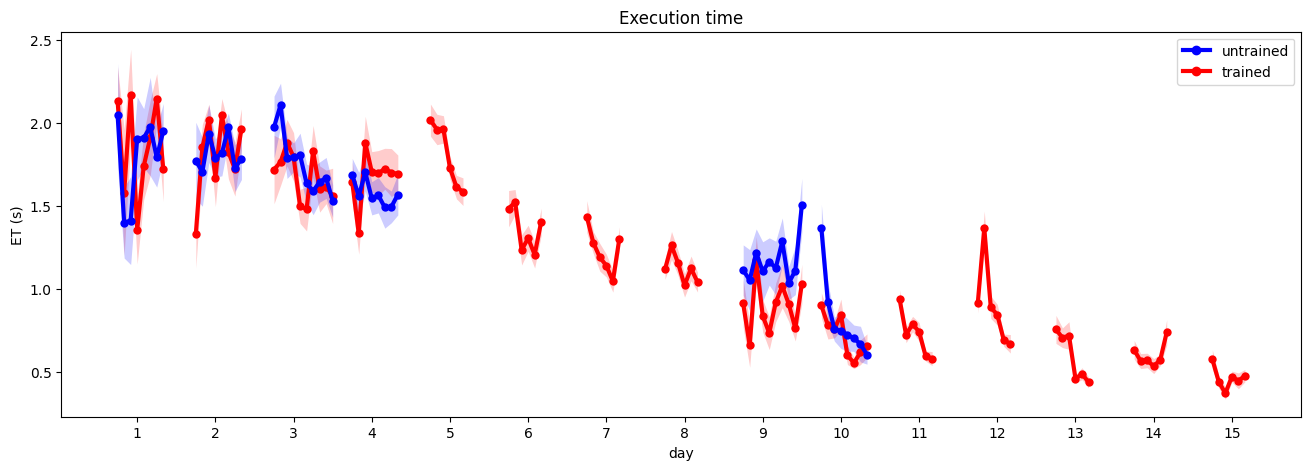

In [18]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp['day'] = day  # <--- Add day column
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

# Create offset
offset = 12
dat['offset'] = dat['BN'] + dat['day'] * offset

# Plot
fig, axs = plt.subplots(figsize=(16, 5))
sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
             palette=['red'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
             palette=['blue'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})

xticks = [(day * offset) + (offset / 2) - 2 for day in range(1, until_day + 1)]
axs.set_xticks(xticks)
axs.set_xticklabels(np.linspace(1, until_day, until_day, dtype=int))
axs.set_title('Execution time')
axs.set_ylabel('ET (s)')
axs.set_xlabel('day')

# Custom legend
custom_handles = [
    Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
    Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)
]
axs.legend(handles=custom_handles, loc='upper right', ncol=1)

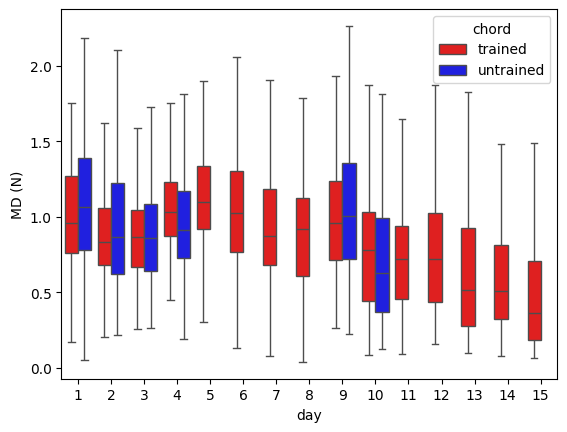

In [19]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='MD', data=dat, hue='chord',showfliers=False, palette=['red', 'blue'])

plt.ylabel('MD (N)')
plt.show()

/tmp/ipykernel_776956/1068632839.py:15: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
/tmp/ipykernel_776956/1068632839.py:17: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,


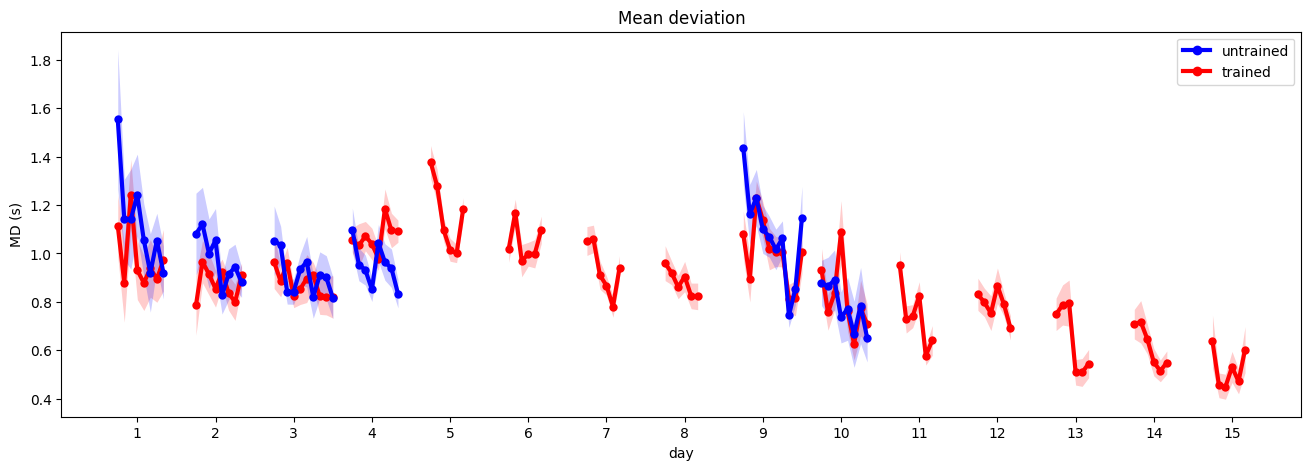

In [20]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp['day'] = day  # <--- Add day column
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

# Create offset
offset = 12
dat['offset'] = dat['BN'] + dat['day'] * offset

# Plot
fig, axs = plt.subplots(figsize=(16, 5))
sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
             palette=['red'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
             palette=['blue'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})

xticks = [(day * offset) + (offset / 2) - 2 for day in range(1, until_day + 1)]
axs.set_xticks(xticks)
axs.set_xticklabels(np.linspace(1, until_day, until_day, dtype=int))
axs.set_title('Mean deviation')
axs.set_ylabel('MD (s)')
axs.set_xlabel('day')

# Custom legend
custom_handles = [
    Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
    Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)
]
axs.legend(handles=custom_handles, loc='upper right', ncol=1)

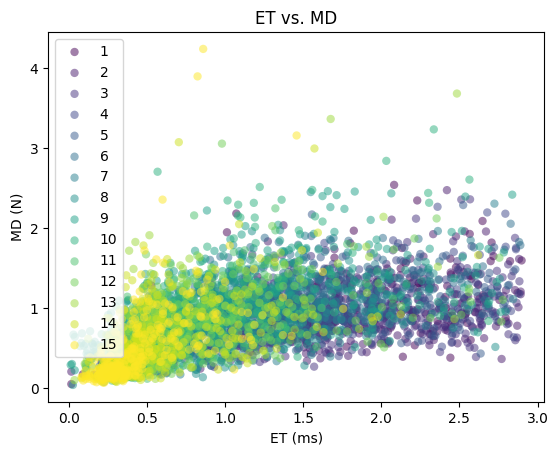

In [21]:
cmap=cm['viridis']
cindx = np.linspace(0, cmap.N - 1, len(days), dtype=int)
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat = pd.read_csv(path, sep='\t')
    dat = dat[dat['trialPoint']==1]

    plt.scatter(dat['ET'], dat['MD'], alpha=.5, edgecolors='none', color=cmap.colors[cindx[day - 1]], label=day)

plt.xlabel('ET (ms)')
plt.ylabel('MD (N)')
plt.title('ET vs. MD')
plt.legend()

plt.show()


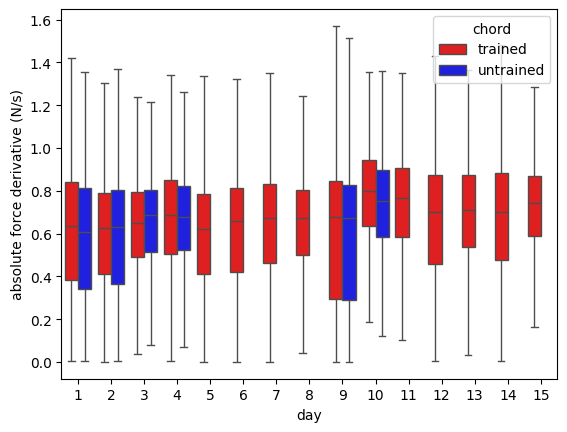

In [22]:
dat = pd.DataFrame()
for d, day in enumerate(days):
    dat_tmp = pd.read_csv(os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}', f'{experiment}_{sn}_single_trial.tsv'), sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat_tmp['day'] = day
    dat_tmp_melt = dat_tmp.melt(id_vars=['chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', value_name='force_der')
    dat = pd.concat([dat, dat_tmp_melt], ignore_index=True)

sns.boxplot(x='day', y='force_der', data=dat, hue='chord',showfliers=False, palette=['red', 'blue'])

plt.ylabel('absolute force derivative (N/s)')
plt.show()